In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

data=pd.read_excel("caschool.xlsx")

state=500449260+500354333+500080960+490238266

train = data.sample(frac=0.8, random_state=state)
test = data[data.index.isin(train.index)==False].copy()

train=train.reset_index(drop=True)
test=test.reset_index(drop=True)


In [2]:
data.shape

(420, 18)

In [3]:
data.head()

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


# Part 1:

<span style="color:red">Exploratory analysis for the average 5th grade reading and math test score</span>

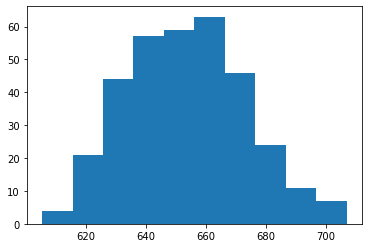

In [4]:
plt.hist(train['testscr'])
plt.show()

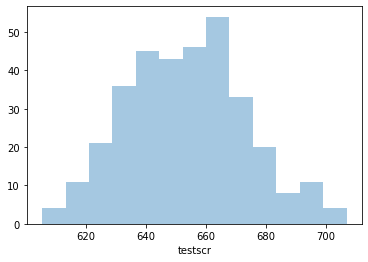

In [5]:
sns.distplot(train['testscr'], kde=False)

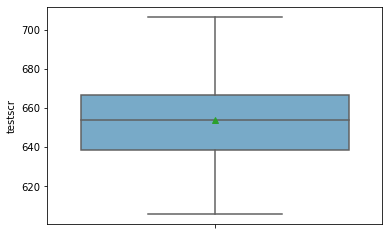

In [6]:
ax = sns.boxplot(y='testscr', data=train, palette='Blues', showmeans=True)

In [7]:
stats.describe(train['testscr'])

DescribeResult(nobs=336, minmax=(605.550048828125, 706.75), mean=653.638244447254, variance=389.2171934738866, skewness=0.17172717055176942, kurtosis=-0.3364615319474509)

In [8]:
train['testscr'].describe()

count    336.000000
mean     653.638244
std       19.728588
min      605.550049
25%      638.337494
50%      653.750000
75%      666.662506
max      706.750000
Name: testscr, dtype: float64

<span style="color:red">Exploratory analysis for class size</span>

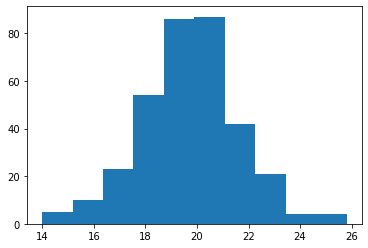

In [9]:
plt.hist(train['str'])
plt.show()

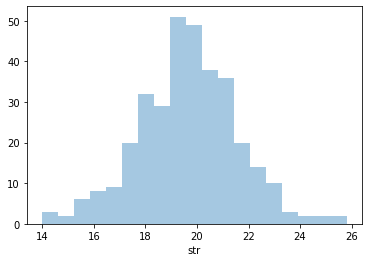

In [10]:
sns.distplot(train['str'], kde=False)

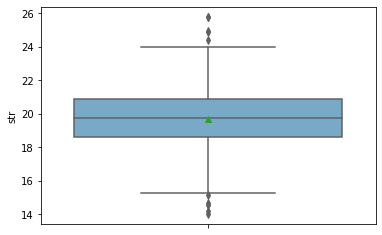

In [11]:
ax = sns.boxplot(y='str', data=train, palette='Blues', showmeans=True)

In [12]:
stats.describe(train['str'])

DescribeResult(nobs=336, minmax=(14.0, 25.799999237060547), mean=19.688011816569738, variance=3.6849930839836875, skewness=-0.01784836265060128, kurtosis=0.5932404450192532)

In [13]:
train['str'].describe()

count    336.000000
mean      19.688012
std        1.919634
min       14.000000
25%       18.630548
50%       19.760090
75%       20.902418
max       25.799999
Name: str, dtype: float64

<span style="color:red">Exploratory analysis for relationship between class size and the average 5th grade reading and math test score</span>

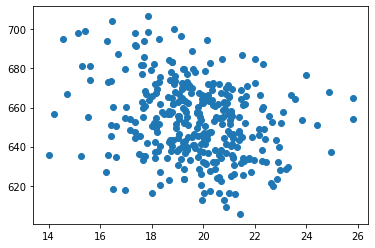

In [14]:
plt.scatter(train['str'],train['testscr'])

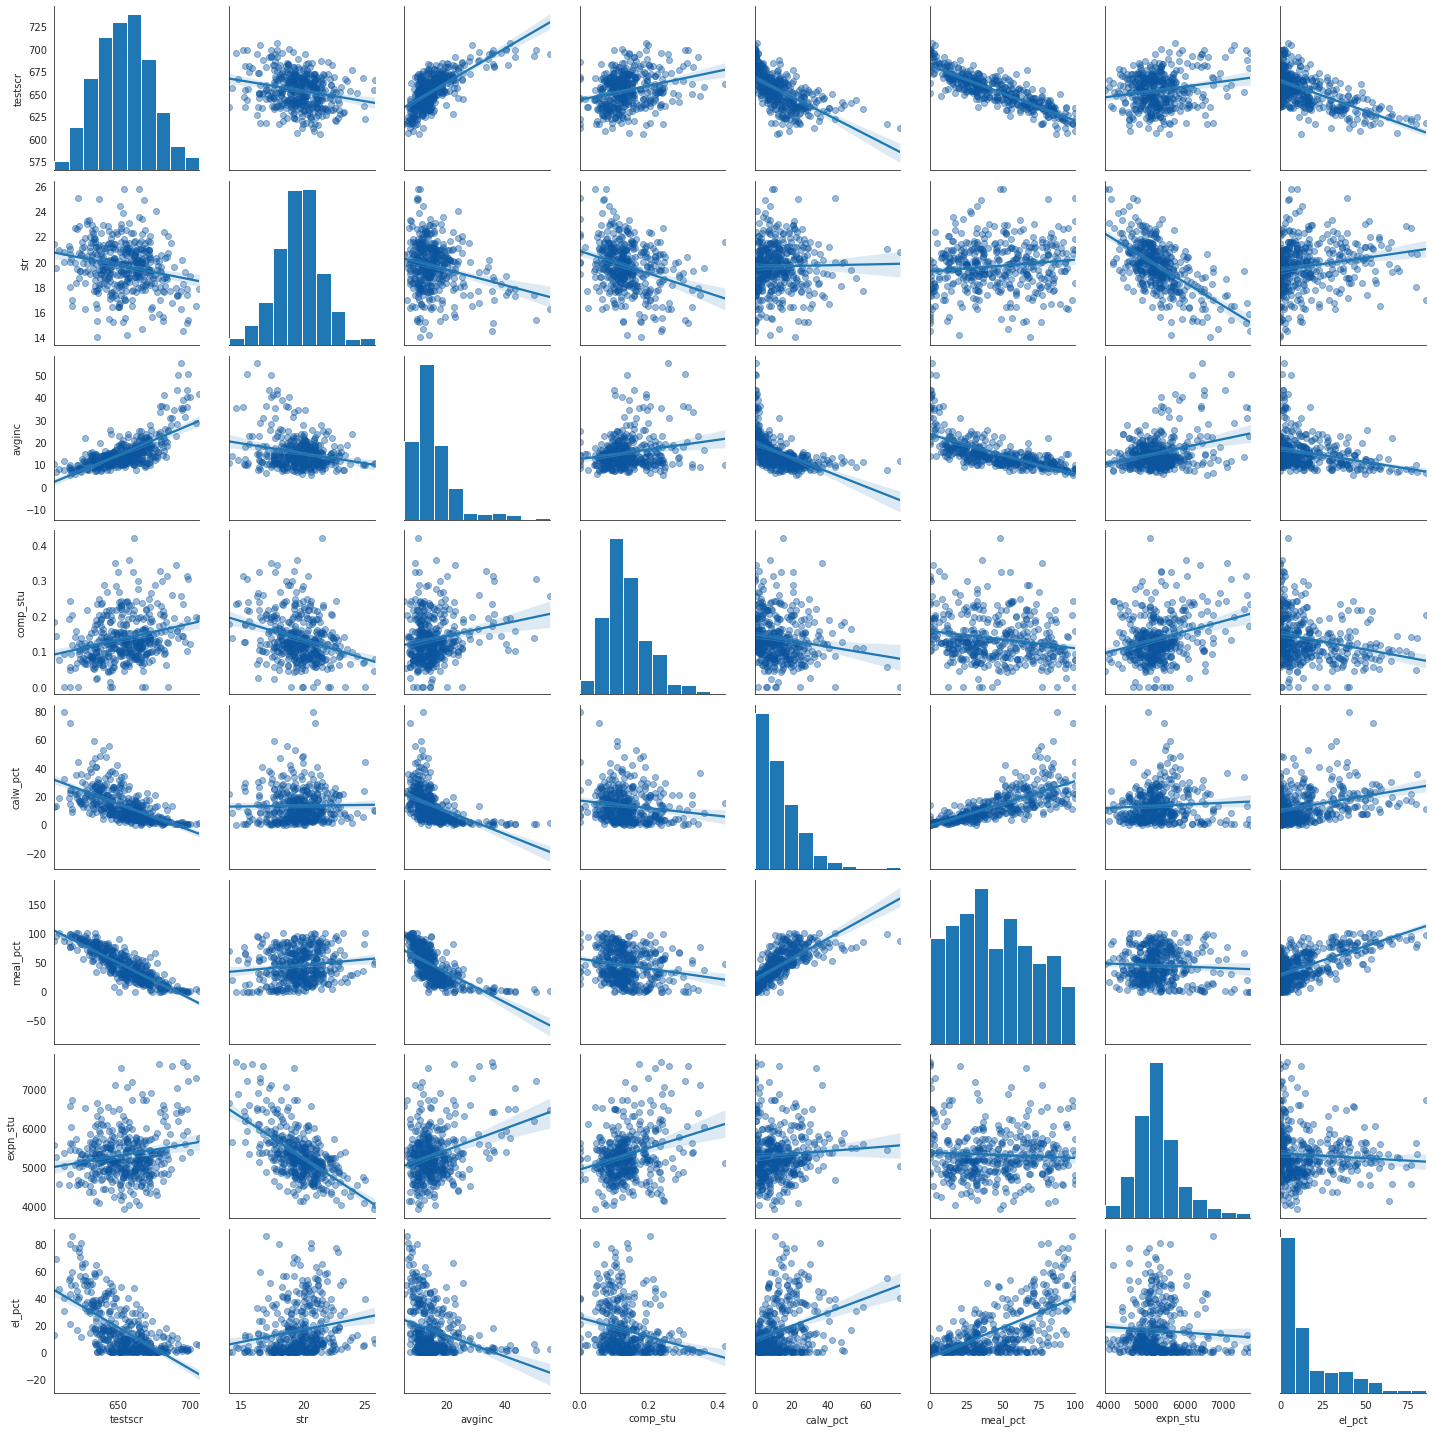

In [15]:
variables=['testscr','str','avginc','comp_stu','calw_pct','meal_pct','expn_stu','el_pct']
with sns.axes_style('white'):
    g=sns.pairplot(data[variables], kind='reg', 
                   plot_kws={'scatter_kws' :{'color': sns.color_palette('Blues')[-1], 'alpha': 0.4}})
plt.tight_layout()

# Part 2:

<span style="color:red">Test for relationship between class size and the average 5th grade reading and math test score</span>

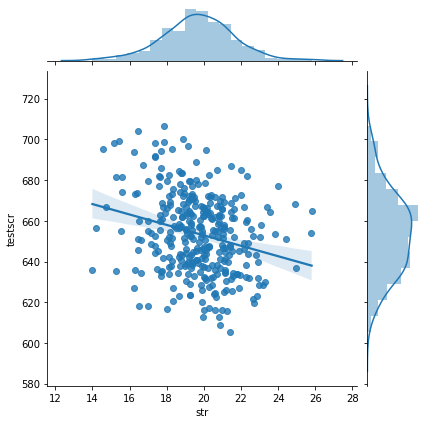

In [16]:
sns.jointplot(x=train['str'], y=train['testscr'], kind="reg")

In [17]:
p, p_value = stats.pearsonr(train['str'],train['testscr'])
p, p_value

(-0.24936962753807818, 3.704781459164857e-06)

From the scatter plot illustrated above, there is a weak negative relationship recognized between the average 5th grade reading and math test score and class size since as the bigger the class size gets, the higer the average 5th grade reading and math test score is. Further evidence supports for this claim can be seen from the correlation coefficient of these two variable, which is registered at -0.25000229153392595 and besides, according to the result of testing hypotheses $H_{\text{0}}: \rho = 0$ versus $H_{\text{1}}: \rho \neq 0$, the p-value of nearly zero claim that this correlation coefficient is significantly different than zero.

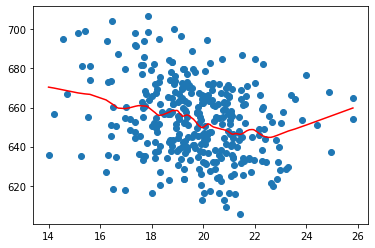

In [18]:
plt.scatter(train['str'],train['testscr'])
z1 = lowess(train['testscr'],train['str'], frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')

From this graph, it can be seen that below 24 students per teacher, the class size does influence the average 5th grade reading and math test score but weakly due to the modest downward curve. However, as soon as the class size crosses that threshold, the impacts become insignificant due to the flat curve. This may or may not be because of "end effects". Besides, although there are some modest up and down in the lowess curve of the average 5th grade reading and math test score against the class size, the scatterplot suggests a potential linear relationship between these two random variables.

In [19]:
reg1 = smf.ols(formula = 'testscr ~ str', data =train).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     22.15
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           3.70e-06
Time:                        12:17:31   Log-Likelihood:                -1467.5
No. Observations:                 336   AIC:                             2939.
Df Residuals:                     334   BIC:                             2947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    704.0954     10.772     65.361      0.000     682.905     725.286
str           -2.5628      0.545     -4.706      0.000      -3.634      -1.492
==============================================================================
Omnibus:                        6.238   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                3.824
Skew:                           0.033   Prob(JB):                        0.148
Kurtosis:                       2.481   Cond. No.                         205.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\widehat{\text{average test score}} = 701.8810-2.4463\times \text{class size}$

Thus, for any one student per teacher increase in the class size, the corresponding 2.4463 decrease will expect to be recognized in the mean of the average 5th grade reading and math test score.

In [20]:
reg1.mse_resid**0.5

19.13390956728194

In [21]:
hypothesis = 'str = 0'
t_test = reg1.t_test(hypothesis) 
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -2.5628      0.545     -4.706      0.000      -3.634      -1.492


The hypotheses are:

$H_0$: $\beta_{1} = 0$

$H_1$: $\beta_{1} \neq 0$

We choose $\alpha=0.05$ as standard. 

The test statistics is $t = \frac{\hat{\beta_1}}{SE (\hat{\beta_1})} = \frac{-2.4463}{0.518}=-4.719$, which has a Student-t distribution with $n-p-1=336-1-1=334$ degrees of freedom, , if the null of coefficient is zero, and the assumptions are also, true. 

The chance that the resulting Student-t value would be more extreme than $-4.719$, in the direction of the alternative hypothesis which is less than or greater than 0. Specifically, the p-value is $2\times P(t_{334} < -4.719) = 0.000$. 

Hence, such p-value is $< 0.05$, it is statistically sufficient for us to reject the null and conclude that there is a significant impact of the class size on the average 5th grade reading and math test score. 

<span style="color:red">Strength of fit assessment</span>

In [22]:
reg1.mse_resid, reg1.mse_resid**0.5

(366.10649532892336, 19.13390956728194)

The $R^{2} = 0.063$ and $R_{adjusted}^2 = 0.060$, which is relatively low and thus, can only demonstrate a weak strength fit to the data. Besides, $SER = 17.6734$, showing that the standard deviation of the residuals is approximately 17.6734, which is significant for practical purposes. Besides, it is neccessary for us to have a education consultant to consult whether such an error is a relatively small or larger standard deviation when predicting the average score.

<span style="color:red">Goodness of fit assessment</span>

Text(0.5, 1.0, 'Predictor vs residuals')

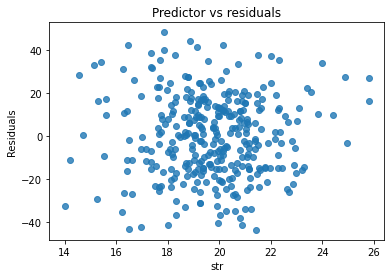

In [23]:
fig, ax = plt.subplots()
sns.regplot(x='str', y=reg1.resid, data=train, fit_reg=False)
ax.set_xlabel('str')
ax.set_ylabel('Residuals')
ax.set_title('Predictor vs residuals')

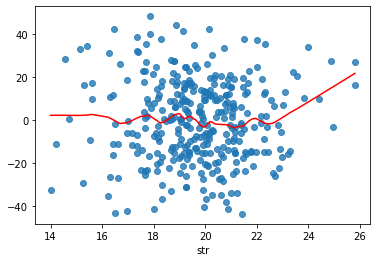

In [24]:
sns.regplot(x = 'str', y = reg1.resid, data=train, fit_reg = False)
ax.set_xlabel('str')
ax.set_ylabel('Residuals')
ax.set_title('Predictor vs residuals')
z1 = lowess(reg1.resid,train['str'], frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')

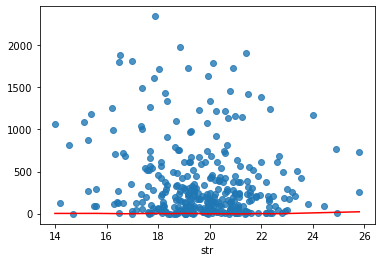

In [25]:
sns.regplot(x = 'str', y = reg1.resid**2, data=train, fit_reg = False)
ax.set_xlabel('str')
ax.set_ylabel('Residuals')
ax.set_title('Predictor vs residuals')
z1 = lowess(reg1.resid,train['str'], frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')

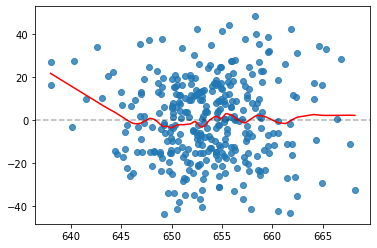

In [26]:
sns.regplot(x=reg1.fittedvalues, y=reg1.resid, data=train, fit_reg = False)
ax.set_xlabel('fitted values')
ax.set_ylabel('Residuals')
ax.set_title('fitted values vs residuals')
z1 = lowess(reg1.resid,reg1.fittedvalues, frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  

Observing the lowess line of the rediual against class size, the curve does not deviate much around zero and relatively flat, which suggest the linearity relationship and $E(\varepsilon|X)=0$ may hold for this data.

In [27]:
stats.describe(reg1.resid)

DescribeResult(nobs=336, minmax=(-43.68462878303205, 48.43358439552901), mean=-6.042996790797805e-13, variance=365.0136401189863, skewness=0.032590221225007564, kurtosis=-0.5185729024576373)

In [28]:
reg1.resid.describe()

count    3.360000e+02
mean    -6.042997e-13
std      1.910533e+01
min     -4.368463e+01
25%     -1.461825e+01
50%      4.414234e-01
75%      1.345577e+01
max      4.843358e+01
dtype: float64

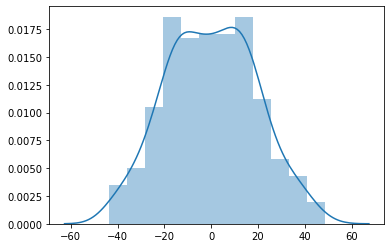

In [29]:
sns.distplot(reg1.resid, kde=True)

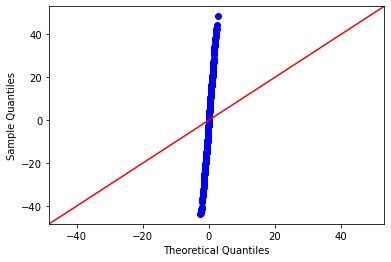

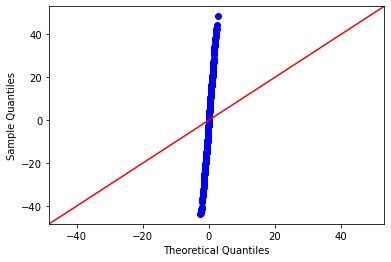

In [30]:
sm.qqplot(reg1.resid, line='45')

From the statistical summary of the sample residuals, the distribution of sample residuals is relatively symmetric and not suffering from many outliers due to the skewness of -0.0896 and the kurtosis of -0.2587. Besides the sample mean of the residuals is $-2.030122\times 10^{-15}$, which suggest that $E(\varepsilon|X)=0$ may hold for this data.

Assumptions assessment:

$1/$ Linearity ($Y= \beta_0 + \beta_1 \times X + \varepsilon$): from the scatter plot, the residuals seem to be nice and evenly distributed around horizontal line 0. As it can be seen from the scatter plot of the average 5th grade reading and math test score against class size, the "lowess" locally-smoothed regression curve fit through the data suggest linearity at least up to 24 students per teacher, where the curve is relatively downward. Thus, this assumption may be met.

$2/$ Exogeneity ($E(\varepsilon|X)=0$): as it can be seen from the "lowess" locally smoothed plot of the residual against the class size does not deviate much around zero and relatively flat up to the level of 24 students per teacher. Nevertheless, as the class size crosses this threshold, the conditional expectation of error tends to be postive due the the upward movement of the lowess line.This may be because of "end effects" and since there are outlying observation, it is not neccessary to pay too much attention to them in terms of evaluating $E(\varepsilon|X)$. However, as suggested by the sample mean of residual of $-2.030122\times 10^{-15}$ which is approximately 0, it is reasonable to conclude that this assumption may be met.

$3/$ Independence ($Y, X$ are independent and identically distributed): this assumption relies on assurance that the average 5th grade reading and math test scores are independent of each other and the class size of each district will not influence each other. In this case, since there is no further context description, we can assume the former condition is true although this is also questionable. On the other, the independence of the average 5th grade reading and math test score can be assumed to be true as long as random sampling was conducted during data gathering. Hence, this assumption can be met in general. 

$4/$ Forth moment exists ($E(X^{4}), E(Y^{4}) < \infty$): considering the dependent variable, which is the average 5th grade reading and math test score, this can reasonable be a bounded variable since the math score and reading are limited from 0 to a certain upper bound logically. Hence, the forth moment of the average 5th grade reading and math test score can be regarded as a finite one. Turning to the predictor, which is the class size, as the population of a district should be bounded between 0 and a certain upper bound, the number of enrolment in a district should be a bounded random variable. The same reasoning can be also applied to the total number of teachers in a district, which makes the number of student per teacher a bounded random variable. Thus, the forth moment of class size should be finite. Hence, this assumption can be met.  

$5/$ Constant error variance ($Var(\varepsilon|X) = \sigma^{2}$): as indicated above by the scatter plot, the residuals are nice and evenly distributed around 0 and no patterns can be observed regarding the residuals. Thus, the $Var(\varepsilon|X)$ may remain constant suggesting this assumption may be met.

# Part 3:

<span style="color:red">Potential omitted variable bias discussion</span>

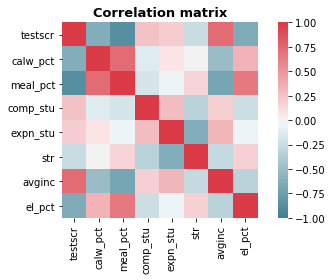

In [31]:
fig, ax = plt.subplots()
variables=['testscr', 'calw_pct', 'meal_pct', 'comp_stu','expn_stu','str','avginc','el_pct']
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train[variables].corr(), vmax=1, vmin=-1, center=0, square=True, ax=ax, cmap=cmap)
ax.set_title('Correlation matrix', fontweight='bold', fontsize=13)
plt.tight_layout()

In [32]:
train[variables].corr()

,testscr,calw_pct,meal_pct,comp_stu,expn_stu,str,avginc,el_pct
testscr,1.000000,-0.628917,-0.869379,0.260083,0.198554,-0.249370,0.731776,-0.646028
calw_pct,-0.628917,1.000000,0.729190,-0.123655,0.073836,0.034104,-0.501329,0.339664
meal_pct,-0.869379,0.729190,1.000000,-0.173166,-0.051840,0.162759,-0.689550,0.663009
comp_stu,0.260083,-0.123655,-0.173166,1.000000,0.296633,-0.328517,0.192429,-0.229701
expn_stu,0.198554,0.073836,-0.051840,0.296633,1.000000,-0.628588,0.327621,-0.049011
str,-0.249370,0.034104,0.162759,-0.328517,-0.628588,1.000000,-0.267098,0.185405
avginc,0.731776,-0.501329,-0.689550,0.192429,0.327621,-0.267098,1.000000,-0.326190
el_pct,-0.646028,0.339664,0.663009,-0.229701,-0.049011,0.185405,-0.326190,1.000000


In [33]:
p, p_value = stats.pearsonr(train['str'],train['avginc'])
p, p_value

(-0.2670978524241826, 6.754577662229377e-07)

In [34]:
p, p_value = stats.pearsonr(train['testscr'],train['avginc'])
p, p_value

(0.7317759129299468, 1.450411202803561e-57)

In [35]:
p, p_value = stats.pearsonr(train['str'],train['comp_stu'])
p, p_value

(-0.32851708686450176, 6.764530840252536e-10)

In [36]:
p, p_value = stats.pearsonr(train['testscr'],train['comp_stu'])
p, p_value

(0.2600828558226955, 1.344527173956702e-06)

In [37]:
p, p_value = stats.pearsonr(train['str'],train['expn_stu'])
p, p_value

(-0.6285875090531329, 2.3873122117390897e-38)

In [38]:
p, p_value = stats.pearsonr(train['testscr'],train['expn_stu'])
p, p_value

(0.19855393307500774, 0.0002497451322484426)

In [39]:
p, p_value = stats.pearsonr(train['str'],train['meal_pct'])
p, p_value

(0.16275897099209025, 0.0027690200853930985)

In [40]:
p, p_value = stats.pearsonr(train['testscr'],train['meal_pct'])
p, p_value

(-0.8693785577932927, 2.805274743418043e-104)

In [41]:
p, p_value = stats.pearsonr(train['str'],train['calw_pct'])
p, p_value

(0.03410442955885762, 0.5332870836454559)

In [42]:
p, p_value = stats.pearsonr(train['testscr'],train['calw_pct'])
p, p_value

(-0.6289172933740858, 2.1278595311845176e-38)

In [43]:
p, p_value = stats.pearsonr(train['str'],train['el_pct'])
p, p_value

(0.18540508380311874, 0.0006365901810909566)

In [44]:
p, p_value = stats.pearsonr(train['testscr'],train['el_pct'])
p, p_value

(-0.6460282944115574, 4.4717762899100777e-41)

<span style="color:red">Multiple regression model including potential variables causing omitted variable bias fitting</span>

In [45]:
reg2 = smf.ols(formula = 'testscr ~ str+avginc+meal_pct+comp_stu+expn_stu+el_pct', data =train).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     244.2
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          6.02e-118
Time:                        12:17:35   Log-Likelihood:                -1193.3
No. Observations:                 336   AIC:                             2401.
Df Residuals:                     329   BIC:                             2427.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    653.1153     10.149     64.353      0.000     633.150     673.080
str           -0.0140      0.323     -0.043      0.965      -0.649       0.621
avginc         0.6601      0.097      6.826      0.000       0.470       0.850
meal_pct      -0.4039      0.031    -12.874      0.000      -0.466      -0.342
comp_stu      16.9687      7.879      2.154      0.032       1.470      32.468
expn_stu       0.0018      0.001      1.848      0.066      -0.000       0.004
el_pct        -0.1785      0.035     -5.109      0.000      -0.247      -0.110
==============================================================================
Omnibus:                        8.093   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.017   Jarque-Bera (JB):               13.730
Skew:                          -0.005   Prob(JB):                      0.00104
Kurtosis:                       3.990   Cond. No.                     1.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
reg2.mse_resid**0.5

8.524649593384508

<span style="color:red">Test for relationship between class size and the average 5th grade reading and math test score</span>

In [47]:
hypothesis = 'str = 0'
t_test = reg2.t_test(hypothesis) 
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0140      0.323     -0.043      0.965      -0.649       0.621


The hypotheses are:

$H_0$: $\beta_{1} = 0$

$H_1$: $\beta_{1} \neq 0$

We choose $\alpha=0.05$ as standard. 

The test statistics is $t = \frac{\hat{\beta_{1}}}{SE (\hat{\beta_{1}})} = \frac{-0.2957}{0.313}=-0.946$, which has a Student-t distribution with $n-p-1=336-7-1=328$ degrees of freedom, , if the null of coefficient is zero, and the assumptions are also, true. 

The chance that the resulting Student-t value would be more extreme than $-0.946$, in the direction of the alternative hypothesis which is less than or greater than 0. Specifically, the p-value is $2\times P(t_{328} < -0.946) = 0.345$. 

Hence, such p-value is $> 0.05$, it is not statistically sufficient for us to reject the null and conclude that there may be no significant impact of the class size on the average 5th grade reading and math test score. 

<span style="color:red">Strength of fit assessment</span>

In [48]:
reg2.mse_resid, reg2.mse_resid**0.5

(72.66965068999066, 8.524649593384508)

The $R^{2} = 0.806$ and $R_{adjusted}^2 = 0.802$, which is relatively high and thus, can demonstrate a strong fit to the data. Besides, $SER = 8.1129$, showing that the standard deviation of the residuals is approximately 8.1129, which is significant for practical purposes. Besides, it is neccessary for us to have a education consultant to consult whether such an error is a relatively small or larger standard deviation when predicting the average score.

<span style="color:red">Goodness of fit assessment</span>

Text(0.5, 1.0, 'fitted values vs residuals')

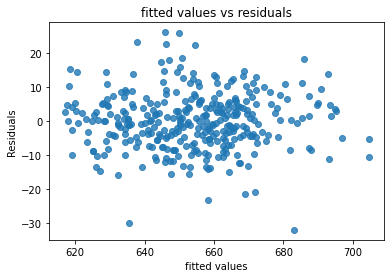

In [49]:
fig, ax = plt.subplots()
sns.regplot(x=reg2.fittedvalues, y=reg2.resid, data=train, fit_reg=False)
ax.set_xlabel('fitted values')
ax.set_ylabel('Residuals')
ax.set_title('fitted values vs residuals')

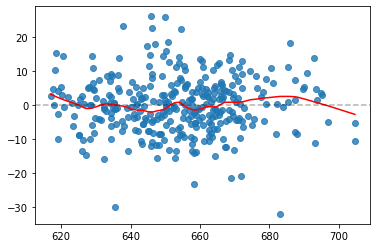

In [50]:
sns.regplot(x=reg2.fittedvalues, y=reg2.resid, data=train, fit_reg = False)
ax.set_xlabel('fitted values')
ax.set_ylabel('Residuals')
ax.set_title('fitted values vs residuals')
z1 = lowess(reg2.resid,reg2.fittedvalues, frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  

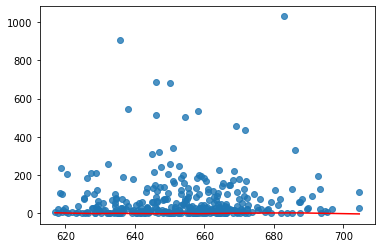

In [51]:
sns.regplot(x = reg2.fittedvalues, y = reg2.resid**2, data=train, fit_reg = False)
ax.set_xlabel('fitted values')
ax.set_ylabel('Residuals')
ax.set_title('fitted values vs residuals')
z1 = lowess(reg2.resid,reg2.fittedvalues, frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')

Observing the lowess line of the rediual against the fitted values, the curve does not deviate much around zero and relatively flat, which suggest the linearity relationship and $E(\varepsilon|X)=0$ may hold for this data.

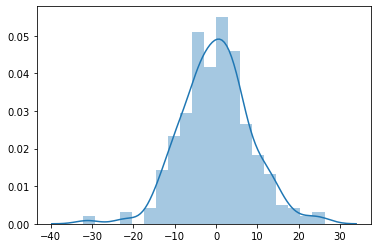

In [52]:
sns.distplot(reg2.resid, kde=True)

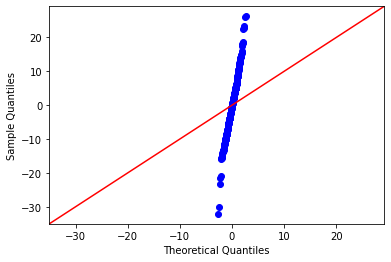

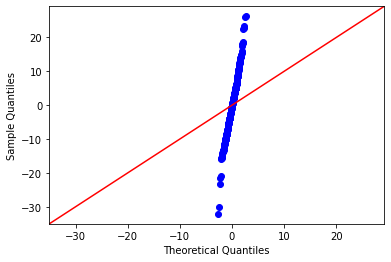

In [53]:
sm.qqplot(reg2.resid, line='45')

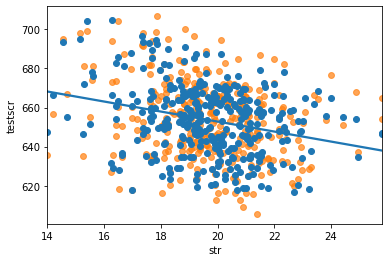

In [54]:
tableau=['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8c564b', '#e377c2', '#7f7f7f']
sns.regplot(train['str'], train['testscr'], ci=None, scatter_kws={'s': 35, 'color': tableau[1], 'alpha': 0.7})
plt.scatter(train['str'], reg2.fittedvalues)   # green dots
plt.show()

In [55]:
stats.describe(reg2.resid)

DescribeResult(nobs=336, minmax=(-32.101295150521764, 26.229786118164384), mean=1.1385601456346367e-12, variance=71.36810470748335, skewness=-0.004596065062361324, kurtosis=0.9902525879797919)

In [56]:
reg2.resid.describe()

count    3.360000e+02
mean     1.138560e-12
std      8.447965e+00
min     -3.210130e+01
25%     -5.342644e+00
50%      7.028500e-02
75%      5.048156e+00
max      2.622979e+01
dtype: float64

From the statistical summary of the sample residuals, the distribution of sample residuals is relatively symmetric and not suffering from many outliers due to the skewness of 0.1137 and the kurtosis of 0.6285. Besides the sample mean of the residuals is $7.631567\times 10^{-12}$, which suggest that $E(\varepsilon|X)=0$ may hold for this data.

In [57]:
for i in ['testscr','str','avginc','meal_pct','comp_stu','expn_stu','el_pct']:
    print('statistical summary of {}'.format(i))
    print(stats.describe(train[i]))

statistical summary of testscr
DescribeResult(nobs=336, minmax=(605.550048828125, 706.75), mean=653.638244447254, variance=389.2171934738866, skewness=0.17172717055176942, kurtosis=-0.3364615319474509)
statistical summary of str
DescribeResult(nobs=336, minmax=(14.0, 25.799999237060547), mean=19.688011816569738, variance=3.6849930839836875, skewness=-0.01784836265060128, kurtosis=0.5932404450192532)
statistical summary of avginc
DescribeResult(nobs=336, minmax=(5.335000038146973, 55.327999114990234), mean=15.317710310220718, variance=57.13478117219427, skewness=2.210970100964396, kurtosis=6.164692979686942)
statistical summary of meal_pct
DescribeResult(nobs=336, minmax=(0.0, 100.0), mean=45.52211484255358, variance=772.9863490069112, skewness=0.14729248160514438, kurtosis=-1.0575828263052112)
statistical summary of comp_stu
DescribeResult(nobs=336, minmax=(0.0, 0.4208333194255829), mean=0.13547923495449746, variance=0.004138962051419853, skewness=0.8103313084558122, kurtosis=1.1993809

In [58]:
train[['testscr','str','avginc','meal_pct','comp_stu','expn_stu','el_pct']].corr()

,testscr,str,avginc,meal_pct,comp_stu,expn_stu,el_pct
testscr,1.000000,-0.249370,0.731776,-0.869379,0.260083,0.198554,-0.646028
str,-0.249370,1.000000,-0.267098,0.162759,-0.328517,-0.628588,0.185405
avginc,0.731776,-0.267098,1.000000,-0.689550,0.192429,0.327621,-0.326190
meal_pct,-0.869379,0.162759,-0.689550,1.000000,-0.173166,-0.051840,0.663009
comp_stu,0.260083,-0.328517,0.192429,-0.173166,1.000000,0.296633,-0.229701
expn_stu,0.198554,-0.628588,0.327621,-0.051840,0.296633,1.000000,-0.049011
el_pct,-0.646028,0.185405,-0.326190,0.663009,-0.229701,-0.049011,1.000000


Assumptions assessment:

$1/$ Linearity ($Y= \beta_0 + \beta_1\times X_{1}+\beta_2\times X_{2}+\beta_3\times X_{3}+\beta_4\times X_{4}+\beta_5\times X_{5}+\beta_6\times X_{6}+\beta_7\times X_{7} + \varepsilon$): from the scatter plot, the residuals seem to be nice and evenly distributed around horizontal line 0. Thus, this assumption may be met.

$2/$ Exogeneity ($E(\varepsilon|X_{1},X_{2},X_{3},X_{4},X_{5},X_{6},X_{7})=0$): as it can be seen from the "lowess" locally smoothed plot of the residual against the fitted values does not deviate much around zero and relatively flat. Furthermore, as suggested by the sample mean of residual of $7.631567\times 10^{-12}$ which is approximately 0, it is reasonable to conclude that this assumption may be met.

$3/$ Independence ($Y, X_{1}, X_{2}, X_{3}, X_{4}, X_{5}, X_{6}, X_{7}$ are independent and identically distributed): this assumption relies on assurance that the average 5th grade reading and math test scores are independent of each other and the class size, average income, percentage for reduced-price lunch of each district will not influence each other. In this case, since there is no further context description, we can assume the former condition is true although this is also questionable. On the other hand, the independence of the average 5th grade reading and math test score can be assumed to be true as long as random sampling was conducted during data gathering. Hence, this assumption can be met in general. 

$4/$ Forth moment exists ($E(X_{1}^{4}), E(X_{2}^{4}), E(X_{3}^{4}), E(X_{4}^{4}), E(X_{5}^{4}), E(X_{6}^{4}), E(X_{7}^{4}) , E(Y^{4}) < \infty$): this assumption can be met due to the following reasons.

Considering the average 5th grade reading and math test score, this can reasonable be a bounded variable since the math score and reading are limited from 0 to a certain upper bound logically. Hence, the forth moment of the average 5th grade reading and math test score can be regarded as a finite one. 

Considering the class size, as the population of a district should be bounded between 0 and a certain upper bound, the number of enrolment in a district should be a bounded random variable. The same reasoning can be also applied to the total number of teachers in a district, which makes the number of student per teacher a bounded random variable. Thus, the forth moment of class size should be finite. 

Considering district average income, as income of a person should be bounded, it is reasonable to claim that district average income is a bounded random variable. Thus, the forth moment of district average income should be finite. However, the high kurtosis of 5.7880 of district average income should be monitored cautiously since it is significantly larger than 0, which is an indication of excessive outliers and the possible violation of the existence of forth moment.

Considering computer per student, as the number of the computers  and the number of students in a district should be bounded below by 0 and some certain upper bounds, computer per student should be a bounded random variable. Thus, the forth moment of computer per student is finite.   

Considering percentage qualifying for CALWORK, this value is bounded between 0 and 100. Thus, the forth moment of percentage qualifying for CALWORK is finite. However, the high kurtosis of 5.3393 of percentage qualifying for CALWORK should be monitored cautiously since it is significantly larger than 0, which is an indication of excessive outliers and the possible violation of the existence of forth moment.

Considering percentage qualifying for reduced-price lunch, this value is bounded between 0 and 100. Thus, the forth moment of percentage qualifying for reduced-price lunch is finite.

Considering expenditure per student, as the number of students and total income of the schools in a district is limited, expenditure per student should be a bounded random variable. Thus, the forth moment of expenditure per student is finite. However, the high kurtosis of 2.2863 of percentage expenditure per student should be monitored cautiously since it is significantly larger than 0, which is an indication of excessive outliers and the possible violation of the existence of forth moment.

Considering percentage of English learners, this value is bounded between 0 and 100. Thus, the forth moment of percentage of English learners is finite.

$5/$ No perfect collinearity among $X_{1},X_{2},X_{3},X_{4},X_{5},X_{6},X_{7}$: by observing the matrix of correlation coeficient, there are a significantly high positive correlation between percentage qualifying for CALWORK and percentage qualifying for reduced-price lunch, which is 0.726103 and also a significantly high negative correlation between percentage qualifying for reduced-price lunch and district average income, which is -0.687885. Thus, this assumption may be violated.

$6/$ Constant error variance ($Var(\varepsilon|X_{1},X_{2},X_{3},X_{4},X_{5},X_{6},X_{7}) = \sigma^{2}$): as indicated above by the scatter plot, the residuals are nice and evenly distributed around 0 and no patterns can be observed regarding the residuals. Thus, the $Var(\varepsilon|X_{1},X_{2},X_{3},X_{4},X_{5},X_{6},X_{7})$ may remain constant suggesting this assumption may be met.

<span style="color:red">Level and sources of multi-collinearity assessment</span>

In [59]:
features = train[['str','avginc','meal_pct','comp_stu','expn_stu','el_pct']]
features = sm.add_constant(features) 
features.head()

,const,str,avginc,meal_pct,comp_stu,expn_stu,el_pct
0,1.0,18.957144,12.749143,51.770901,0.152223,5358.517090,8.842000
1,1.0,17.655367,14.177000,14.400000,0.200000,4645.413086,0.000000
2,1.0,19.643900,11.238000,40.564602,0.082714,5193.692383,5.943536
3,1.0,22.281553,14.603000,31.370899,0.097603,4631.243652,13.986929
4,1.0,17.891304,10.551000,55.285500,0.154313,5331.920898,2.187120


In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(6):
    vif.append(variance_inflation_factor(features.values, i+1))
print(vif)
np.mean(vif)

[1.7676879330112705, 2.4636658933535975, 3.5070588120905457, 1.184377954671282, 1.9275985936474678, 1.9923515211232137]


2.1404567846495626

While the VIFs for class size, district average income, computer per student, percentage qualifying for CALWORK, expenditure per student, percentage of English learners are lower than 3 as indicated above, that of , percentage qualifying for reduced-price lunch is larger than 5. The mean VIF is also < 3 since it is equal to 2.5131 < 3. Thus, the inclusion of percentage qualifying for reduced-price lunch may be problematic due to the high possibility of multi-collinearity in the fitted model. This may impact the uniqueness of the coefficient of other variables in the model and thus, the result of the test for relationship between class size and the average 5th grade reading and math test score may no longer be valid.

# Part 4:

<span style="color:red">Variable and model selection</span>

In [61]:
train['avginc_elpct']=train['avginc']*train['el_pct']

train['mealpct_elpct']=train['el_pct']*train['meal_pct']

train['avginc_power_2']=train['avginc']**2

train['calwpct_log']=np.log(train['calw_pct']+1)

train['str_step']=np.where(train['str']>23,1,0)*(train['str']-23)

train['elpct_step']=np.where(train['el_pct']>20,1,0)*(train['el_pct']-20)

Model 3: Linear spline

In [62]:
reg3 = smf.ols(formula = 'testscr ~ str+str_step', data =train).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     14.81
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           6.91e-07
Time:                        12:17:39   Log-Likelihood:                -1463.9
No. Observations:                 336   AIC:                             2934.
Df Residuals:                     333   BIC:                             2945.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    716.3300     11.626     61.615      0.000     693.460     739.200
str           -3.2073      0.592     -5.421      0.000      -4.371      -2.043
str_step      10.7049      4.027      2.658      0.008       2.782      18.627
==============================================================================
Omnibus:                        5.080   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                3.299
Skew:                           0.016   Prob(JB):                        0.192
Kurtosis:                       2.516   Cond. No.                         225.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
reg3.mse_resid**0.5

18.96251923174243

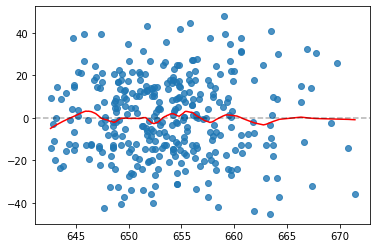

In [64]:
sns.regplot(x=reg3.fittedvalues, y=reg3.resid, data=train, fit_reg = False)
ax.set_xlabel('fitted values')
ax.set_ylabel('Residuals')
ax.set_title('fitted values vs residuals')
z1 = lowess(reg3.resid,reg3.fittedvalues, frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  

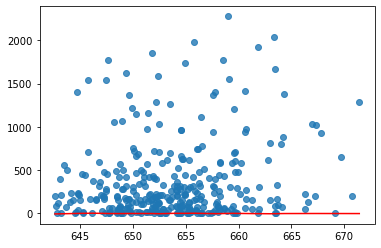

In [65]:
sns.regplot(x = reg3.fittedvalues, y = reg3.resid**2, data=train, fit_reg = False)
ax.set_xlabel('fitted values')
ax.set_ylabel('Residuals')
ax.set_title('fitted values vs residuals')
z1 = lowess(reg3.resid,reg3.fittedvalues, frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')

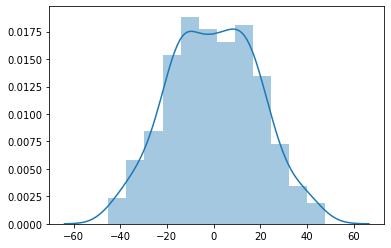

In [66]:
sns.distplot(reg3.resid, kde=True)

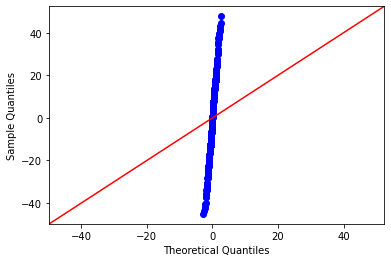

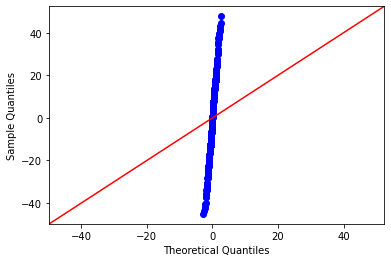

In [67]:
sm.qqplot(reg3.resid, line='45')

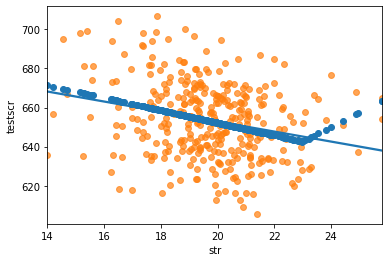

In [68]:
tableau=['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8c564b', '#e377c2', '#7f7f7f']
sns.regplot(train['str'], train['testscr'], ci=None, scatter_kws={'s': 35, 'color': tableau[1], 'alpha': 0.7})
plt.scatter(train['str'], reg3.fittedvalues)   # green dots
plt.show()

Model 4: quadratic polynomial, interaction

In [117]:
reg4 = smf.ols(formula = 'testscr ~ str+el_pct+avginc+avginc_power_2+avginc_elpct', data =train).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     194.6
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           3.95e-96
Time:                        12:20:15   Log-Likelihood:                -1247.5
No. Observations:                 336   AIC:                             2507.
Df Residuals:                     330   BIC:                             2530.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        624.2537      6.869     90.876      0.000     610.741     637.767
str               -0.2656      0.300     -0.887      0.376      -0.855       0.324
el_pct            -0.1629      0.086     -1.891      0.059      -0.332       0.007
avginc             3.4532      0.345     10.007      0.000       2.774       4.132
avginc_power_2    -0.0366      0.006     -5.732      0.000      -0.049      -0.024
avginc_elpct      -0.0240      0.007     -3.441      0.001      -0.038      -0.010
==============================================================================
Omnibus:                        6.092   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                8.020
Skew:                          -0.126   Prob(JB):                       0.0181
Kurtosis:                       3.713   Cond. No.                     6.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
reg4.mse_resid**0.5

10.002611556161705

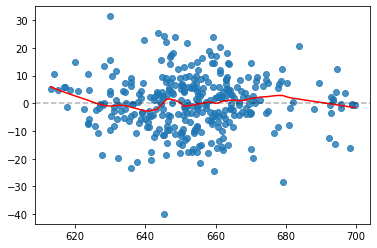

In [71]:
sns.regplot(x=reg4.fittedvalues, y=reg4.resid, data=train, fit_reg = False)
ax.set_xlabel('fitted values')
ax.set_ylabel('Residuals')
ax.set_title('fitted values vs residuals')
z1 = lowess(reg4.resid,reg4.fittedvalues, frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  

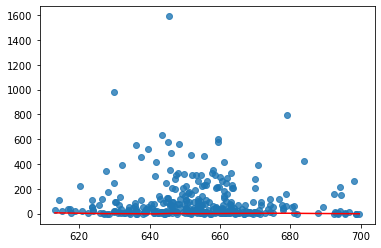

In [72]:
sns.regplot(x = reg4.fittedvalues, y = reg4.resid**2, data=train, fit_reg = False)
ax.set_xlabel('fitted values')
ax.set_ylabel('Residuals')
ax.set_title('fitted values vs residuals')
z1 = lowess(reg4.resid,reg4.fittedvalues, frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')

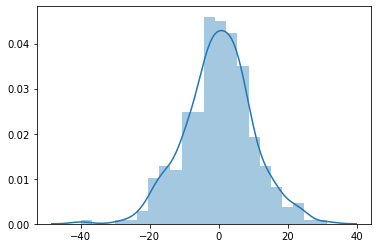

In [73]:
sns.distplot(reg4.resid, kde=True)

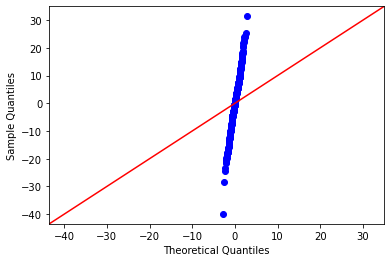

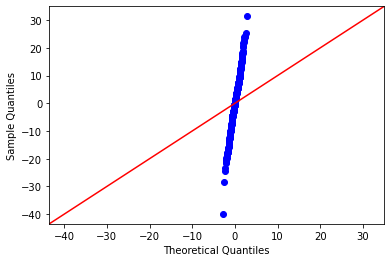

In [74]:
sm.qqplot(reg4.resid, line='45')

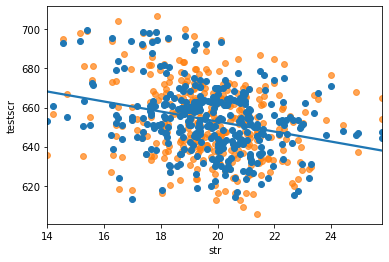

In [75]:
tableau=['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8c564b', '#e377c2', '#7f7f7f']
sns.regplot(train['str'], train['testscr'], ci=None, scatter_kws={'s': 35, 'color': tableau[1], 'alpha': 0.7})
plt.scatter(train['str'], reg4.fittedvalues)   # green dots
plt.show()

Model 5: quadratic polynomial, log transformation

In [76]:
reg5 = smf.ols(formula = 'testscr ~ str+avginc+avginc_power_2+calwpct_log', data =train).fit()
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     172.2
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           1.50e-79
Time:                        12:17:44   Log-Likelihood:                -1289.2
No. Observations:                 336   AIC:                             2588.
Df Residuals:                     331   BIC:                             2607.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        666.0523      8.773     75.920      0.000     648.794     683.310
str               -1.0215      0.336     -3.039      0.003      -1.683      -0.360
avginc             2.4023      0.343      7.012      0.000       1.728       3.076
avginc_power_2    -0.0284      0.006     -4.521      0.000      -0.041      -0.016
calwpct_log       -9.0566      0.995     -9.105      0.000     -11.013      -7.100
==============================================================================
Omnibus:                        0.735   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.692   Jarque-Bera (JB):                0.498
Skew:                           0.027   Prob(JB):                        0.780
Kurtosis:                       3.181   Cond. No.                     6.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
reg5.mse_resid**0.5

11.307559260138094

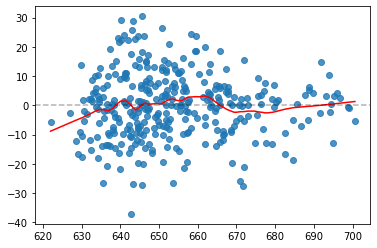

In [78]:
sns.regplot(x=reg5.fittedvalues, y=reg5.resid, data=train, fit_reg = False)
ax.set_xlabel('fitted values')
ax.set_ylabel('Residuals')
ax.set_title('fitted values vs residuals')
z1 = lowess(reg5.resid,reg5.fittedvalues, frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  

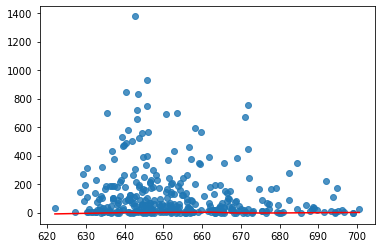

In [79]:
sns.regplot(x = reg5.fittedvalues, y = reg5.resid**2, data=train, fit_reg = False)
ax.set_xlabel('fitted values')
ax.set_ylabel('Residuals')
ax.set_title('fitted values vs residuals')
z1 = lowess(reg5.resid,reg5.fittedvalues, frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')

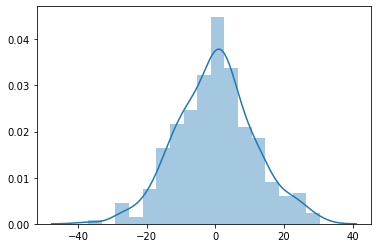

In [80]:
sns.distplot(reg5.resid, kde=True)

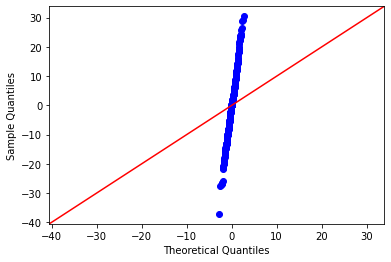

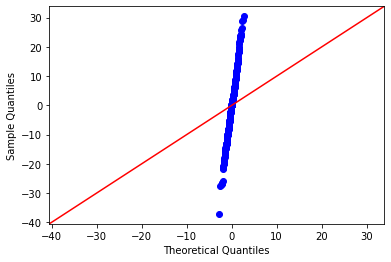

In [81]:
sm.qqplot(reg5.resid, line='45')

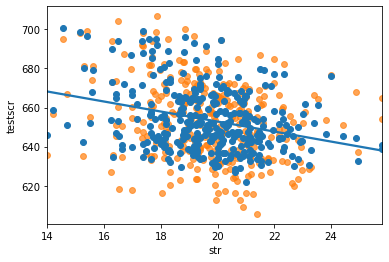

In [82]:
tableau=['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8c564b', '#e377c2', '#7f7f7f']
sns.regplot(train['str'], train['testscr'], ci=None, scatter_kws={'s': 35, 'color': tableau[1], 'alpha': 0.7})
plt.scatter(train['str'], reg5.fittedvalues)   # green dots
plt.show()

Model 6

In [83]:
variable_set=['testscr','str','avginc','expn_stu','el_pct','comp_stu','calw_pct','meal_pct','str_step','elpct_step','elpct_step','avginc_power_2','calwpct_log','avginc_elpct','mealpct_elpct']

Forward selection

In [84]:
def forward_selected(data, response, nominated = []):
    remaining = set(data.columns)
    selected = nominated
    remaining.remove(response)
    remaining ^= set(selected)
    current_score, best_new_score = 0.0, 0.0
    if nominated:
        formula = "{} ~ {} + 1".format(response, ' + '.join(nominated))
        current_score= smf.ols(formula, data).fit().rsquared_adj
        best_new_score = current_score
        print("you nominated variable(s) %s, the adj_r2 is: %f" %(nominated, current_score))
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            print("adding %s increases adj_r2 from %f to %f" %(best_candidate, current_score, best_new_score))
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    print("final model is %s, with adj_r2 of %f" %(formula, model.rsquared_adj))
    return model

In [85]:
forward_selected(train[variable_set], 'testscr', ['str'])

you nominated variable(s) ['str'], the adj_r2 is: 0.059377
adding meal_pct increases adj_r2 from 0.059377 to 0.766377
adding avginc increases adj_r2 from 0.766377 to 0.792431
adding el_pct increases adj_r2 from 0.792431 to 0.809248
adding calwpct_log increases adj_r2 from 0.809248 to 0.812846
adding elpct_step increases adj_r2 from 0.812846 to 0.815904
adding str_step increases adj_r2 from 0.815904 to 0.818454
adding comp_stu increases adj_r2 from 0.818454 to 0.820460
adding expn_stu increases adj_r2 from 0.820460 to 0.821784
adding avginc_power_2 increases adj_r2 from 0.821784 to 0.821801
final model is testscr ~ str + meal_pct + avginc + el_pct + calwpct_log + elpct_step + str_step + comp_stu + expn_stu + avginc_power_2 + 1, with adj_r2 of 0.821801


In [86]:
reg6 = smf.ols(formula = 'testscr ~ str + meal_pct + avginc + el_pct + calwpct_log + elpct_step + str_step + comp_stu + expn_stu + avginc_power_2', data =train).fit()
reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     155.5
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.97e-117
Time:                        12:17:50   Log-Likelihood:                -1183.4
No. Observations:                 336   AIC:                             2389.
Df Residuals:                     325   BIC:                             2431.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        660.3993     10.526     62.742      0.000     639.692     681.106
str               -0.2980      0.340     -0.876      0.382      -0.967       0.372
meal_pct          -0.3071      0.045     -6.842      0.000      -0.395      -0.219
avginc             0.9038      0.309      2.928      0.004       0.297       1.511
el_pct            -0.3722      0.086     -4.321      0.000      -0.542      -0.203
calwpct_log       -2.6851      0.991     -2.709      0.007      -4.635      -0.736
elpct_step         0.2545      0.114      2.241      0.026       0.031       0.478
str_step           4.6257      1.821      2.540      0.012       1.043       8.208
comp_stu          15.6889      7.820      2.006      0.046       0.305      31.072
expn_stu           0.0017      0.001      1.750      0.081      -0.000       0.004
avginc_power_2    -0.0054      0.005     -1.016      0.310      -0.016       0.005
==============================================================================
Omnibus:                        9.297   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               16.778
Skew:                          -0.042   Prob(JB):                     0.000227
Kurtosis:                       4.092   Cond. No.                     1.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
reg6.mse_resid**0.5

8.328145550618553

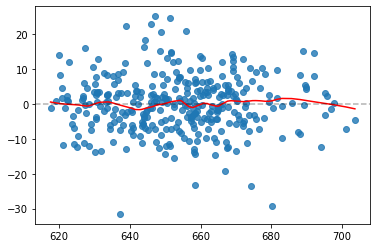

In [88]:
sns.regplot(x=reg6.fittedvalues, y=reg6.resid, data=train, fit_reg = False)
ax.set_xlabel('fitted values')
ax.set_ylabel('Residuals')
ax.set_title('fitted values vs residuals')
z1 = lowess(reg6.resid,reg6.fittedvalues, frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  

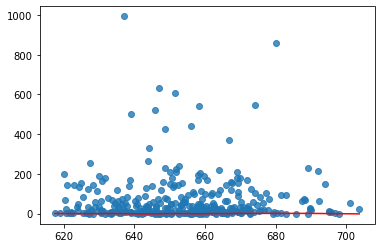

In [89]:
sns.regplot(x = reg6.fittedvalues, y = reg6.resid**2, data=train, fit_reg = False)
ax.set_xlabel('fitted values')
ax.set_ylabel('Residuals')
ax.set_title('fitted values vs residuals')
z1 = lowess(reg6.resid,reg6.fittedvalues, frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')

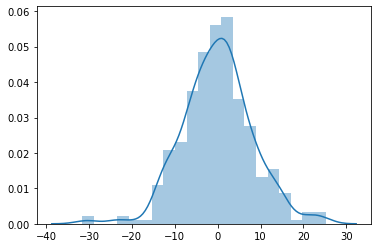

In [90]:
sns.distplot(reg6.resid, kde=True)

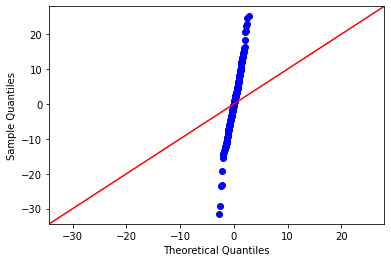

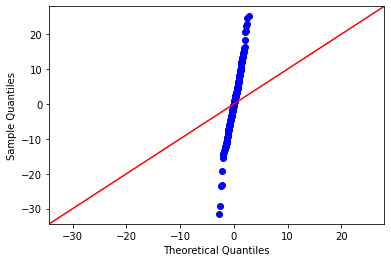

In [91]:
sm.qqplot(reg6.resid, line='45')

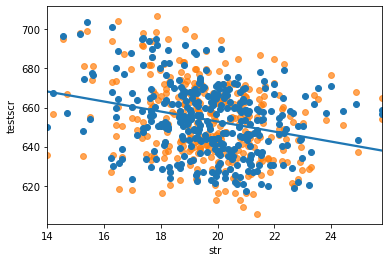

In [92]:
tableau=['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8c564b', '#e377c2', '#7f7f7f']
sns.regplot(train['str'], train['testscr'], ci=None, scatter_kws={'s': 35, 'color': tableau[1], 'alpha': 0.7})
plt.scatter(train['str'], reg6.fittedvalues)   # green dots
plt.show()

Model 7

In [93]:
reg7 = smf.ols(formula = 'testscr ~ str+meal_pct+avginc+el_pct', data =train).fit()
reg7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     356.3
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.53e-118
Time:                        12:17:53   Log-Likelihood:                -1197.9
No. Observations:                 336   AIC:                             2406.
Df Residuals:                     331   BIC:                             2425.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    673.4392      5.995    112.342      0.000     661.647     685.231
str           -0.5264      0.258     -2.039      0.042      -1.034      -0.018
meal_pct      -0.3864      0.031    -12.591      0.000      -0.447      -0.326
avginc         0.7383      0.092      8.064      0.000       0.558       0.918
el_pct        -0.1922      0.035     -5.502      0.000      -0.261      -0.123
==============================================================================
Omnibus:                        7.901   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.019   Jarque-Bera (JB):               13.181
Skew:                          -0.027   Prob(JB):                      0.00137
Kurtosis:                       3.969   Cond. No.                         777.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
reg7.mse_resid**0.5

8.616498068753693

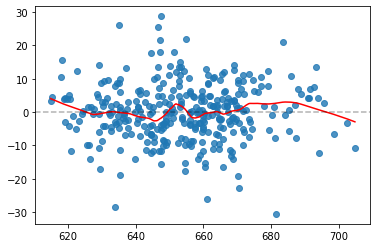

In [95]:
sns.regplot(x=reg7.fittedvalues, y=reg7.resid, data=train, fit_reg = False)
ax.set_xlabel('fitted values')
ax.set_ylabel('Residuals')
ax.set_title('fitted values vs residuals')
z1 = lowess(reg7.resid,reg7.fittedvalues, frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  

Text(0.5, 1.0, 'fitted values vs residuals')

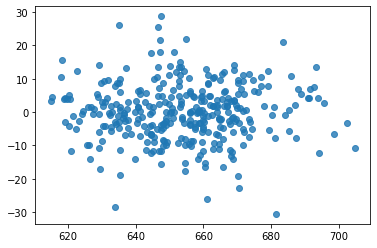

In [96]:
sns.regplot(x=reg7.fittedvalues, y=reg7.resid, data=train, fit_reg = False)
ax.set_xlabel('fitted values')
ax.set_ylabel('Residuals')
ax.set_title('fitted values vs residuals')

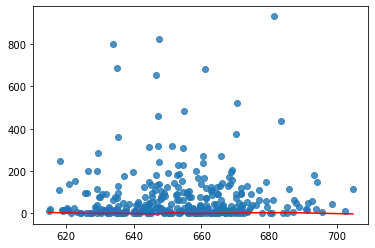

In [97]:
sns.regplot(x = reg7.fittedvalues, y = reg7.resid**2, data=train, fit_reg = False)
ax.set_xlabel('fitted values')
ax.set_ylabel('Residuals')
ax.set_title('fitted values vs residuals')
z1 = lowess(reg7.resid,reg7.fittedvalues, frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')

In [98]:
reg6.resid.describe()

count    3.360000e+02
mean    -1.286116e-11
std      8.202903e+00
min     -3.152834e+01
25%     -5.179691e+00
50%      1.036778e-01
75%      4.533421e+00
max      2.514283e+01
dtype: float64

In [99]:
stats.describe(reg7.resid)

DescribeResult(nobs=336, minmax=(-30.524344200345922, 28.71651054137999), mean=-2.290654438617085e-13, variance=73.35754298114848, skewness=-0.026513277897762477, kurtosis=0.968872628310594)

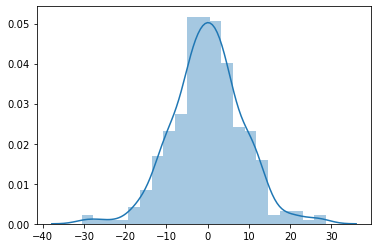

In [100]:
sns.distplot(reg7.resid, kde=True)

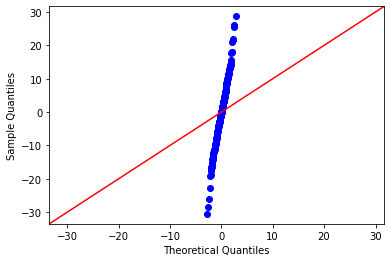

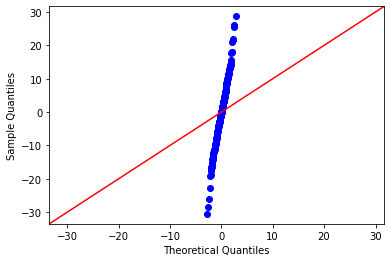

In [101]:
sm.qqplot(reg7.resid, line='45')

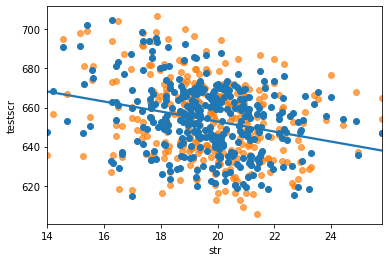

In [102]:
tableau=['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8c564b', '#e377c2', '#7f7f7f']
sns.regplot(train['str'], train['testscr'], ci=None, scatter_kws={'s': 35, 'color': tableau[1], 'alpha': 0.7})
plt.scatter(train['str'], reg7.fittedvalues)   # green dots
plt.show()

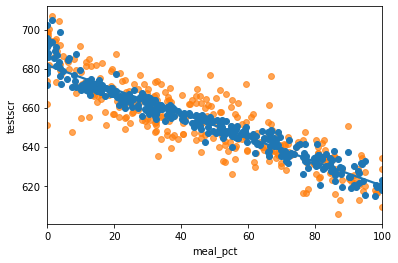

In [103]:
tableau=['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8c564b', '#e377c2', '#7f7f7f']
sns.regplot(train['meal_pct'], train['testscr'], ci=None, scatter_kws={'s': 35, 'color': tableau[1], 'alpha': 0.7})
plt.scatter(train['meal_pct'], reg7.fittedvalues)   # green dots
plt.show()

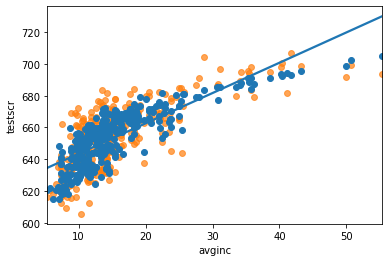

In [104]:
tableau=['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8c564b', '#e377c2', '#7f7f7f']
sns.regplot(train['avginc'], train['testscr'], ci=None, scatter_kws={'s': 35, 'color': tableau[1], 'alpha': 0.7})
plt.scatter(train['avginc'], reg7.fittedvalues)   # green dots
plt.show()

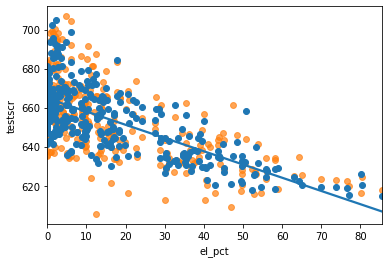

In [105]:
tableau=['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8c564b', '#e377c2', '#7f7f7f']
sns.regplot(train['el_pct'], train['testscr'], ci=None, scatter_kws={'s': 35, 'color': tableau[1], 'alpha': 0.7})
plt.scatter(train['el_pct'], reg7.fittedvalues)   # green dots
plt.show()

In [106]:
features = train[['str','meal_pct','avginc','el_pct']]
features = sm.add_constant(features) 
features.head()

,const,str,meal_pct,avginc,el_pct
0,1.0,18.957144,51.770901,12.749143,8.842000
1,1.0,17.655367,14.400000,14.177000,0.000000
2,1.0,19.643900,40.564602,11.238000,5.943536
3,1.0,22.281553,31.370899,14.603000,13.986929
4,1.0,17.891304,55.285500,10.551000,2.187120


In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(4):
    vif.append(variance_inflation_factor(features.values, i+1))
print(vif)
np.mean(vif)

[1.1083884867959988, 3.284357342501473, 2.160639882243075, 1.9486996321808152]


2.1255213359303404

Model 8

In [108]:
reg8 = smf.ols(formula = 'testscr ~ str+meal_pct+avginc+el_pct+mealpct_elpct+avginc_elpct', data =train).fit()
reg8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     238.0
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.87e-116
Time:                        12:17:57   Log-Likelihood:                -1196.8
No. Observations:                 336   AIC:                             2408.
Df Residuals:                     329   BIC:                             2434.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       673.6908      6.196    108.726      0.000     661.502     685.880
str              -0.4975      0.259     -1.922      0.055      -1.007       0.012
meal_pct         -0.4026      0.036    -11.240      0.000      -0.473      -0.332
avginc            0.7462      0.109      6.871      0.000       0.533       0.960
el_pct           -0.2844      0.214     -1.330      0.184      -0.705       0.136
mealpct_elpct     0.0015      0.002      0.798      0.425      -0.002       0.005
avginc_elpct     -0.0015      0.008     -0.184      0.854      -0.017       0.014
==============================================================================
Omnibus:                        9.142   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               16.469
Skew:                          -0.024   Prob(JB):                     0.000265
Kurtosis:                       4.083   Cond. No.                     2.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
reg8.mse_resid**0.5

8.614447673430638

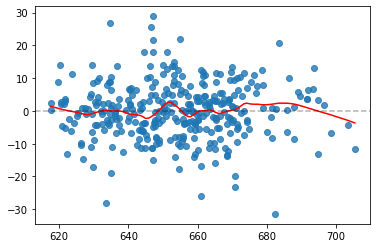

In [110]:
sns.regplot(x=reg8.fittedvalues, y=reg8.resid, data=train, fit_reg = False)
ax.set_xlabel('fitted values')
ax.set_ylabel('Residuals')
ax.set_title('fitted values vs residuals')
z1 = lowess(reg8.resid,reg8.fittedvalues, frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  

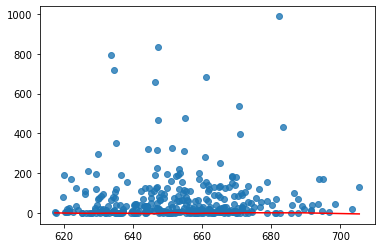

In [111]:
sns.regplot(x = reg8.fittedvalues, y = reg8.resid**2, data=train, fit_reg = False)
ax.set_xlabel('fitted values')
ax.set_ylabel('Residuals')
ax.set_title('fitted values vs residuals')
z1 = lowess(reg8.resid,reg8.fittedvalues, frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')

In [112]:
sns.histplot(reg8.resid, kde=True)

AttributeError: module 'seaborn' has no attribute 'histplot'

In [ ]:
sm.qqplot(reg8.resid, line='45')

In [ ]:
tableau=['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8c564b', '#e377c2', '#7f7f7f']
sns.regplot(train['str'], train['testscr'], ci=None, scatter_kws={'s': 35, 'color': tableau[1], 'alpha': 0.7})
plt.scatter(train['str'], reg8.fittedvalues)   # green dots
plt.show()

# Part 6:

In [ ]:
test['avginc_elpct']=test['avginc']*test['el_pct']

test['mealpct_elpct']=test['el_pct']*test['meal_pct']

test['avginc_power_2']=test['avginc']**2

test['calwpct_log']=np.log(test['calw_pct']+1)

test['str_step']=np.where(test['str']>23,1,0)*(test['str']-23)

test['elpct_step']=np.where(test['el_pct']>20,1,0)*(test['el_pct']-20)

In [ ]:
reg2_predict=reg2.predict({'str':test['str'],'avginc': test['avginc'],'meal_pct': test['meal_pct'],'comp_stu': test['comp_stu'],'expn_stu': test['expn_stu'],'el_pct': test['el_pct']})

reg4_predict=reg4.predict({'str': test['str'],'el_pct': test['el_pct'],'avginc': test['avginc'],'avginc_power_2': test['avginc_power_2'],'avginc_elpct':test['avginc_elpct']})

reg5_predict=reg5.predict({'str': test['str'],'avginc': test['avginc'],'avginc_power_2': test['avginc_power_2'],'calwpct_log': test['calwpct_log']})

reg7_predict=reg7.predict({'str':test['str'],'meal_pct':test['meal_pct'],'avginc': test['avginc'],'el_pct':test['el_pct']})

reg8_predict=reg8.predict({'str':test['str'],'meal_pct':test['meal_pct'],'avginc': test['avginc'],'el_pct':test['el_pct'],'mealpct_elpct':test['mealpct_elpct'],'avginc_elpct': test['avginc_elpct']})

In [ ]:
RMSFE2=(sum((test['testscr']-reg2_predict)**2)/len(reg2_predict))**0.5
MAD2=sum(abs(test['testscr']-reg2_predict))/len(reg2_predict)

In [ ]:
ols2 = smf.ols(formula='testscr~reg2_predict', data=test).fit()
ols2.summary()

In [ ]:
Forecast_R_squared_2= 0.754
print(RMSFE2, MAD2, Forecast_R_squared_2)

In [ ]:
RMSFE4=(sum((test['testscr']-reg4_predict)**2)/len(reg4_predict))**0.5
MAD4=sum(abs(test['testscr']-reg4_predict))/len(reg4_predict)

In [ ]:
ols4 = smf.ols(formula='testscr~reg4_predict', data=test).fit()
ols4.summary()

In [ ]:
Forecast_R_squared_4= 0.627
print(RMSFE4, MAD4, Forecast_R_squared_4)

In [ ]:
RMSFE5=(sum((test['testscr']-reg5_predict)**2)/len(reg5_predict))**0.5
MAD5=sum(abs(test['testscr']-reg5_predict))/len(reg5_predict)

In [ ]:
ols5 = smf.ols(formula='testscr~reg5_predict', data=test).fit()
ols5.summary()

In [ ]:
Forecast_R_squared_5= 0.506
print(RMSFE5, MAD5, Forecast_R_squared_5)

In [ ]:
RMSFE7=(sum((test['testscr']-reg7_predict)**2)/len(reg7_predict))**0.5
MAD7=sum(abs(test['testscr']-reg7_predict))/len(reg7_predict)

In [ ]:
ols7 = smf.ols(formula='testscr~reg7_predict', data=test).fit()
ols7.summary()

In [ ]:
Forecast_R_squared_7=0.762
print(RMSFE7, MAD7, Forecast_R_squared_7)

In [ ]:
RMSFE8=(sum((test['testscr']-reg8_predict)**2)/len(reg8_predict))**0.5
MAD8=sum(abs(test['testscr']-reg8_predict))/len(reg8_predict)

In [ ]:
ols8 = smf.ols(formula='testscr~reg8_predict', data=test).fit()
ols8.summary()

In [ ]:
Forecast_R_squared_8=0.760
print(RMSFE8, MAD8, Forecast_R_squared_8)

In [ ]:
plt.scatter(test['str'], test['testscr'], color=tableau[1])
plt.scatter(test['str'], reg2_predict)
plt.scatter(test['str'], reg4_predict, color=tableau[2])
plt.scatter(test['str'], reg5_predict, color=tableau[3])

In [ ]:
plt.scatter(test['str'], reg7_predict, color=tableau[2])
plt.scatter(test['str'], reg8_predict, color=tableau[3])

In [ ]:
tableau=['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8c564b', '#e377c2', '#7f7f7f']
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

ax1.scatter(test['str'], test['testscr'], color=tableau[1])
ax1.set(title='str vs testscr')
ax2.scatter(test['str'], test['testscr'], color=tableau[1])
ax2.scatter(test['str'], reg2_predict , color=tableau[2])
ax2.set(title='str vs reg2_predict')
ax3.scatter(test['str'], test['testscr'], color=tableau[1])
ax3.scatter(test['str'], reg4_predict, color=tableau[3])
ax3.set(title='str vs reg4_predict')
ax4.scatter(test['str'], test['testscr'], color=tableau[1])
ax4.scatter(test['str'], reg5_predict, color=tableau[4])
ax4.set(title='str vs reg5_predict')
ax5.scatter(test['str'], test['testscr'], color=tableau[1])
ax5.scatter(test['str'], reg7_predict , color=tableau[5])
ax5.set(title='str vs reg7_predict')  
ax6.scatter(test['str'], test['testscr'], color=tableau[1])
ax6.scatter(test['str'], reg8_predict, color=tableau[6])
ax6.set(title='str vs reg8_predict')
plt.show()

### Other subplot

In [ ]:
###sns.histplot(train['str'], kde=False) vs sns.histplot(train['testscr'], kde=False) 
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1= sns.distplot(train['str'], kde=False)
ax1.set(title='str histogram')
ax2= sns.distplot(train['testscr'], kde=False) 
ax2.set(title='testscr histogram')
plt.show()

In [ ]:
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(reg2.fittedvalues, reg2.resid, fit_reg=False) 
ax1.set_xlabel('fitted values') 
ax1.set_ylabel('Residuals') 
ax1.set_title('fitted values2 vs residuals')

ax2= sns.regplot(x=reg2.fittedvalues, y=reg2.resid, data=train, fit_reg = False) 
ax2.set_xlabel('fitted values') 
ax2.set_ylabel('Residuals') 
ax2.set_title('fitted values vs residuals') 
z1 = lowess(reg2.resid,reg2.fittedvalues, frac=1./5) 
plt.plot(z1[:,0],z1[:,1],'red') 
plt.axhline(color='Black', alpha=0.3, linestyle='--')   

plt.show()

In [ ]:
f, axes = plt.subplots(1, 2)

sns.distplot(train['str'], kde=False, ax=axes[0])
sns.distplot(train['testscr'], kde=False, ax=axes[1])



In [ ]:
f, axes = plt.subplots(1, 2)

sns.distplot(train['str'], kde=False, ax=axes[0])
sns.distplot(train['testscr'], kde=False, ax=axes[1])



In [ ]:
f, axes = plt.subplots(1, 2)
ax1= sns.regplot(x=reg2.fittedvalues, y=reg2.resid, data=train, fit_reg = False, ax=axes[0])
ax1.set_title('fitted values vs residuals')
ax1.set_xlabel('fitted values') 
ax1.set_ylabel('Residuals') 
ax2= sns.regplot(x=reg2.fittedvalues, y=reg2.resid, data=train, fit_reg = False, ax=axes[1])
ax2.set_xlabel('fitted values') 
ax2.set_title(' Lowess fitted values vs residuals') 
z1 = lowess(reg2.resid,reg2.fittedvalues, frac=1./5) 
plt.plot(z1[:,0],z1[:,1],'red') 
plt.axhline(color='Black', alpha=0.3, linestyle='--')  



In [ ]:
tableau=['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8c564b', '#e377c2', '#7f7f7f']
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)



sns.regplot(train['str'], train['testscr'], ci=None, scatter_kws={'s': 35, 'color': tableau[], 'alpha': 0.7}, ax=ax1)
ax1.scatter(train['str'], reg6.fittedvalues)   # green dots

sns.regplot(train['meal_pct'], train['testscr'], ci=None, scatter_kws={'s': 35, 'color': tableau[3], 'alpha': 0.7},ax=ax2)
ax2.scatter(train['meal_pct'], reg6.fittedvalues)   # green dots


sns.regplot(train['avginc'], train['testscr'], ci=None, scatter_kws={'s': 35, 'color': tableau[3], 'alpha': 0.7},ax=ax3)
ax3.scatter(train['avginc'], reg6.fittedvalues)   # green dots


sns.regplot(train['el_pct'], train['testscr'], ci=None, scatter_kws={'s': 35, 'color': tableau[3], 'alpha': 0.7},ax=ax4)
ax4.scatter(train['el_pct'], reg6.fittedvalues)   # green dots
plt.show()



In [ ]:
tableau=['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8c564b', '#e377c2', '#7f7f7f']
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(3,2,1)

ax1.scatter(train['str'], train['testscr'])
ax1.scatter(train['str'], reg6.fittedvalues)   # green dots

In [ ]:
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(train['calw_pct'],train['testscr'])
z1 = lowess(train['testscr'],train['calw_pct'], frac=1./5)
ax1.plot(z1[:,0],z1[:,1],'red')
ax1.set_xlabel('calwpct')
ax1.set_ylabel('testscr')

train['calwpct_log']=np.log(train['calw_pct']+1)
ax2.scatter(train['calwpct_log'],train['testscr'])
z2 = lowess(train['testscr'],train['calwpct_log'], frac=1./5)
ax2.plot(z2[:,0],z2[:,1],'green')
ax2.set_xlabel('calwpct_log')

plt.show()



